# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [10]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
from tqdm import tqdm


import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [11]:
N = 2 # put your index here

In [12]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print(u"Реализуем алгоритм кластеризации '%s'" % my_algorithm)

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


In [13]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [14]:
## Задание 1  #Slow algorithm
from sklearn.base import BaseEstimator, ClusterMixin
from collections import Counter
class DBSCAN_slow(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    def dist_eucld(self, x,y):
        return np.linalg.norm(x-y)

    def RangeQuery(self, x, Q_ind):
        Neighbors = []
        Q = x[Q_ind,:]
        for ind, point in enumerate(x):
            if self.dist(Q, point)<self.eps:
                Neighbors.append(ind)
        return Neighbors       
    
    def __init__(self, **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.eps     = kwargs['eps']     if 'eps'     in kwargs else 0.8
        self.min_pts = kwargs['min_pts'] if 'min_pts' in kwargs else 5
        if kwargs['dist']== "euclidian" : self.dist = lambda x,y : self.dist_eucld(x,y)
        else: 
            sys.stderr.write('Chose distanse dist = "euclidian"/...')
        self.label = None
        return
        
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.x_len = len(x)
        C = -1
        label = {}
        for ind, point in enumerate(x):
            if ind in label: continue                                      #Previously processed in inner loop
            Neighbors = self.RangeQuery(x, ind)                            #Find neighbors
            if len(Neighbors) < self.min_pts:                              #Density check
                label[ind] = -1                                            #Label as Noise
                continue
            C = C+1                                                        #next cluster label
            S = Neighbors.copy()                                           #Neighbors to expand
            c = -1
            while(c<len(S)-1):                                             #Process every seed point
                c+=1                                                        
                Q = S[c]
                if Q in label:                                             #Change Noise to border point
                    if label[Q] == -1: 
                        label[Q] = C
                        continue
#                     else: print("FUCK")
                label[Q] = C                                               #Label neighbor 
                Neighbors = self.RangeQuery(x, Q)                          #Find neighbors
                if len(Neighbors) >= self.min_pts:                         #Density check
                    S.extend(list(set(Neighbors) - set(S)))                #Add new neighbors to seed set
        self.label = label
        return self
    
    
    def predict(self, x, show_outliers = False):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        if self.label == None:
            sys.stderr.write("Firstly fit the model please")
            return None
        if show_outliers:
            return list(self.label.values())
        else:
            label = self.label
            for ind, none in filter(lambda x:x[1]==-1, self.label.items()):
                srt = Counter([self.label[i] for i in self.RangeQuery(x, ind)])
                label[ind] = srt[0] if srt[0] != -1 or len(srt)<=1 else srt[1]
        return list(label.values())
    
    

    
    def fit_predict(self, x, y=None, show_outliers = False):
        self.fit(x, y)
        return self.predict(x, show_outliers = show_outliers)

y_predict = DBSCAN_slow(eps = 0.5, min_pts = 5, dist = "euclidian").fit_predict(x_iris, show_outliers = True)
print('iris results\t'+str(Counter(y_predict)))

iris results	Counter({0: 49, 1: 44, -1: 7})


In [413]:
## Задание 1 
from sklearn.base import BaseEstimator, ClusterMixin
from collections import Counter
from scipy.spatial import distance_matrix


class DBSCAN(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """   
    
    def __init__(self, **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.eps     = kwargs['eps']     if 'eps'     in kwargs else 0.8
        self.min_pts = kwargs['min_pts'] if 'min_pts' in kwargs else 5
        self.label = None
        return
        
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        DIST = distance_matrix(x,x) #
        self.DIST = DIST
        
        self.x_len = len(x)
        C = 0
        y = np.zeros(self.x_len )-1
        for ind in range(self.x_len):
            if y[ind] != -1:
                continue                                                   #Previously processed in inner loop
            Neighbors = np.where(DIST[ind,:]<self.eps)[0]                  #Find neighbors
            if len(Neighbors) < self.min_pts:                              #Density check
                y[ind] = 0                                                 #Label as Noise
                continue
            C = C+1                                                        #next cluster label
            y[ind] = C
            
            S = list(np.delete(Neighbors, np.argwhere(Neighbors == ind)))  #Neighbors to expand
            c = -1
            while(c<len(S)-1):                                             #Process every seed point
                c += 1                                                        
                ind2 = S[c]
                if y[ind2] == 0  : y[ind2] != C                            #Change Noise to border point
                if y[ind2] != -1 : continue
                    
                y[ind2] = C                                                #Label neighbor 
                Neighbors = np.where(DIST[ind2,:]<self.eps)[0]             #Find neighbors
                if len(Neighbors) >= self.min_pts:                         #Density check
                    S.extend(list(set(Neighbors) - set(S)))                #Add new neighbors to seed set
        self.label = y
        return self
    
    
    def predict(self, x, show_outliers = True):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        if show_outliers:
            return self.label-1
        else:
            label = self.label
            for ind in np.where(self.label == 0)[0]:
                srt = self.DIST[ind, :]
                q = ind
                while(label[q] == 0):
                    q = np.argmin(srt)
                    srt[q] = 1e4
                label[ind] = label[q]
            return label-1
    
    def fit_predict(self, x, y=None, show_outliers = True):
        self.fit(x, y)
        return self.predict(x, show_outliers = show_outliers)
    
y_predict = DBSCAN(eps = 0.5, min_pts = 5).fit_predict(x_iris, show_outliers = True)
print("iris test (with outliers)\t"+str(Counter(y_predict)))

y_predict = DBSCAN(eps = 0.5, min_pts = 5).fit_predict(x_iris, show_outliers = False)
print("iris test\t\t\t"+str(Counter(y_predict)))

iris test (with outliers)	Counter({0.0: 49, 1.0: 44, -1.0: 7})
iris test			Counter({0.0: 50, 1.0: 50})


In [16]:
mod = DBSCAN(eps = 0.5, min_pts = 5, dist = "euclidian")
mod.fit(x_iris)
y_predict = mod.predict(x_iris, show_outliers=False)
from sklearn.metrics import accuracy_score
temp1 = accuracy_score(y_predict, y_iris)
temp0 = accuracy_score([int(i==0) for i in y_predict], y_iris)
print("Accurancy results: "+str(max(temp0,temp1)))

Accurancy results: 1.0


## Measure time

In [17]:
def get_data(x1,x2, shape):
        n = int(shape[0]/2)
        X = np.zeros((n*2, shape[1]))
        for i in range(shape[1]):
            X[:,i] = np.concatenate((
                np.random.normal(x1[i][0],x1[i][1], n),
                np.random.normal(x2[i][0],x2[i][1], n)
            ))
        return X
X = get_data([[3,1]]*4,[[-1,1]]*4, (1000,4))

In [18]:
from tqdm import tqdm
m1,m2,m3 = [],[],[]
t = []
k = 4
for i in tqdm(np.arange(10, 10000, 1000)):
    t.append(i)
    X = get_data([[1,0.4]]*k, [[-1,0.4]]*k,(i,k))
#     tmp = %timeit -r 1 -o -q DBSCAN_slow(eps = 0.5, min_pts = 5, dist = "euclidian").fit_predict(X)
#     m1.append(tmp)

    tmp = %timeit -r 1 -o -q DBSCAN(eps = 0.5, min_pts = 5).fit_predict(X, show_outliers = True)
    m2.append(tmp)

    from sklearn.cluster import DBSCAN as DBSCAN_sklearn
    tmp = %timeit -r 1 -o -q DBSCAN_sklearn(eps = 0.5, min_samples = 5).fit_predict(X)
    m3.append(tmp)



100%|██████████| 10/10 [01:23<00:00, 12.70s/it]


In [20]:
from sklearn.cluster import DBSCAN as DBSCAN_sklearn
from tqdm import tqdm
results = {
    "DBSCAN (use scipy.spatial.distance_matrix (KDtree))":[],
    "DBSCAN sklearn":[],
    'size':[]
}
t = []
k = 4
for i in tqdm(np.arange(100,30000,1000)):
    X = get_data([[-10,10]]*k, [[10,2]]*k,(i,k))
    
    tmp = %timeit -r 1 -o -q DBSCAN(eps = 0.5, min_pts = 5).fit_predict(X, show_outliers = True)
    results["DBSCAN (use scipy.spatial.distance_matrix (KDtree))"].append(tmp)


    tmp = %timeit -r 1 -o -q DBSCAN_sklearn(eps = 0.5, min_samples = 5, algorithm="kd_tree").fit_predict(X)
    results["DBSCAN sklearn"].append(tmp)
    results['size'].append(i)


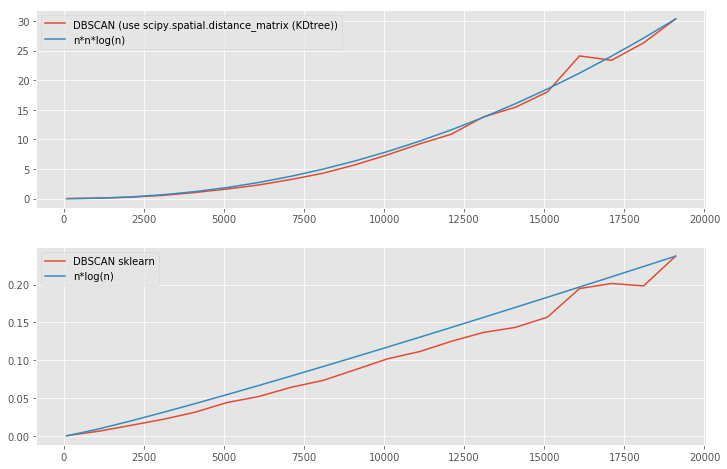

In [410]:
NRES = 20
def assymtotic(name, t, lst):
    if name == "DBSCAN (use scipy.spatial.distance_matrix (KDtree))":
        i = t[-1]
        Norm = lst[-1]/(i*i*math.log(i))
        return [Norm*i*i*math.log(i) for i in t]
    elif name == "DBSCAN sklearn":
        i = t[-1]
        Norm = lst[-1]/(i*math.log(i))
        return [Norm*i*math.log(i) for i in t]

    return None
    
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(12,8)


for name in ["DBSCAN (use scipy.spatial.distance_matrix (KDtree))"]:#, "DBSCAN sklearn"]:
    lst = results[name][:NRES]
    t   = results['size'][:NRES]
    ax1.plot(t, [i.average for i in lst], label = name)
    tmp = assymtotic(name, results['size'][:NRES], [k.average for k in results[name][:NRES]])
    if tmp != None:
        ax1.plot(t, tmp, label = "n*n*log(n)")
ax1.legend()

for name in ["DBSCAN sklearn"]:
    lst = results[name][:NRES]
    t   = results['size'][:NRES]
    ax2.plot(t, [i.average for i in lst], label = name)
    tmp = assymtotic(name, results['size'][:NRES], [k.average for k in results[name][:NRES]])
    if tmp != None:
        ax2.plot(t, tmp, label = "n*log(n)")
ax2.legend()
plt.show()

In [414]:
print("DBSCAN Hand make distanse")
%timeit -r 1 mod = DBSCAN_slow(eps = 0.01, min_pts = 5, dist = "euclidian").fit_predict(x_iris)

print("DBSCAN scipy.spatial.distance_matrix ")
%timeit -r 1 mod = DBSCAN(eps=0.8, min_pts = 4).fit_predict(x_iris)

from sklearn.cluster import DBSCAN as DBSCAN_sklearn
print("DBSCAN sklearn")
%timeit -r 1 mod = DBSCAN_sklearn(eps = 0.01, min_samples = 5).fit_predict(x_iris)


DBSCAN Hand make distanse
152 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
DBSCAN scipy.spatial.distance_matrix 
2.08 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
DBSCAN sklearn
911 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


#### Самая простая реализация алгоритма - n^3
#### Используя scipy.spatial.distance_matrix - n^2*log(n)
####  Sklearn работает за n*log(n)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

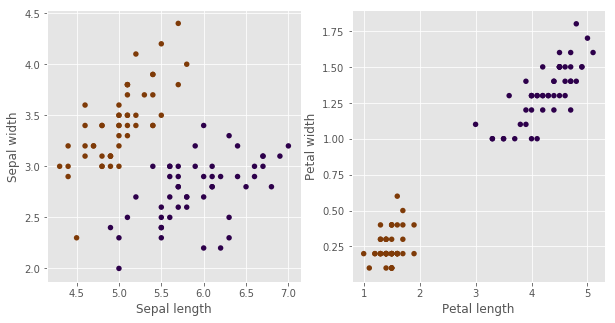

In [23]:

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

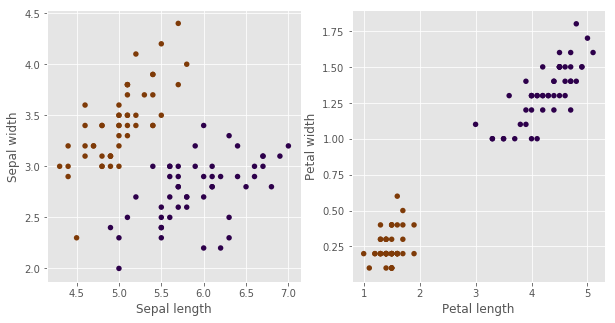

In [24]:
pl.figure(figsize=(10, 5))
pred_iris = DBSCAN(eps = 0.9, min_pts = 5, dist = "euclidian").fit_predict(x_iris)


pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=pred_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=pred_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [25]:
pred_iris = DBSCAN(eps = 0.9, min_pts = 5, dist = "euclidian").fit_predict(x_iris)
print("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [26]:
## Задание 2

from sklearn.metrics import silhouette_score
def quality(x, y, eps = 0.8, min_pts = 5, dtype = 0):
    """
    Implement quality criterion of your choice
    """
    def dist(x,y):
        return np.linalg.norm(x-y)
    if dtype == 0:
    # Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
        centroid = {}
        label = {c:l for c,l in enumerate(y)}
        for i in set(y):
            centroid[i] = np.array([x[i[0]] for i in filter(lambda x:x[1]==i, label.items())]).mean()
        dist = sum([(x[i[0]] - centroid[i[1]])**2 for i in label.items()])
        return dist
    if dtype == 1:
    # Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)   centroid = {}
        dist_lst = []
        label = {c:l for c,l in enumerate(y)}
        for i in set(y):
            MAXDIST = 0
            for k,none1 in filter(lambda x:x[1] == i,label.items()):
                for j, none2 in filter(lambda x:x[1] == i,label.items()):
                    curDist = dist(x[k],x[j])
                    if curDist > MAXDIST: MAXDIST = curDist
                    pass
            dist_lst.append(MAXDIST)
        return np.array(dist_lst).mean()
    #Sihouette
    if dtype == 2:
        if len(set(y)) == 1: return 666
        temp = None
        try:
            temp = silhouette_score(x, y)
        except:
            temp = 666
        return temp
print(quality(x_iris, y_iris, dtype = 0))
print(quality(x_iris, y_iris, dtype = 1))
print(quality(x_iris, y_iris, dtype = 2))

1297.3964
2.5718829762
0.736936816023


Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

In [27]:
min_pts = range(1, 12)
eps     = np.linspace(0.01, 4, 100)

criteria1 = np.zeros((len(min_pts), len(eps)))
criteria2 = np.zeros((len(min_pts), len(eps)))
criteria3 = np.zeros((len(min_pts), len(eps)))


x = x_iris
for i0, k0 in enumerate(min_pts):
    for i, k in tqdm(enumerate(eps)):
        cls = DBSCAN(eps = k, min_pts = k0)
        y = cls.fit_predict(x)
        criteria1[i0,i] = quality(x, y, dtype = 0)
        criteria2[i0,i] = quality(x, y, dtype = 1)
        criteria3[i0,i] = quality(x, y, dtype = 2)



0it [00:00, ?it/s]
1it [00:00,  3.66it/s]
2it [00:00,  3.67it/s]
3it [00:00,  3.56it/s]
4it [00:01,  3.46it/s]
5it [00:01,  3.63it/s]
6it [00:01,  4.18it/s]
8it [00:01,  5.30it/s]
11it [00:01,  6.81it/s]
14it [00:01,  8.59it/s]
17it [00:02, 10.41it/s]
19it [00:02, 12.06it/s]
21it [00:02, 13.53it/s]
24it [00:02, 14.82it/s]
26it [00:02, 15.58it/s]
28it [00:02, 16.44it/s]
30it [00:02, 16.62it/s]
33it [00:02, 17.93it/s]
35it [00:03, 18.47it/s]
38it [00:03, 19.25it/s]
40it [00:03, 19.26it/s]
42it [00:03, 17.72it/s]
44it [00:03, 14.94it/s]
46it [00:03, 13.69it/s]
48it [00:03, 12.66it/s]
50it [00:04, 11.77it/s]
52it [00:04, 11.42it/s]
54it [00:04, 11.18it/s]
56it [00:04, 11.09it/s]
58it [00:04, 10.81it/s]
60it [00:05, 10.98it/s]
62it [00:05, 11.13it/s]
64it [00:05, 11.03it/s]
66it [00:05, 10.35it/s]
68it [00:05, 10.44it/s]
70it [00:06,  9.71it/s]
72it [00:06, 10.23it/s]
74it [00:06,  9.99it/s]
76it [00:06, 10.56it/s]
78it [00:06, 10.82it/s]
80it [00:07, 10.95it/s]
82it [00:07, 10.92it/s]
84i

Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)


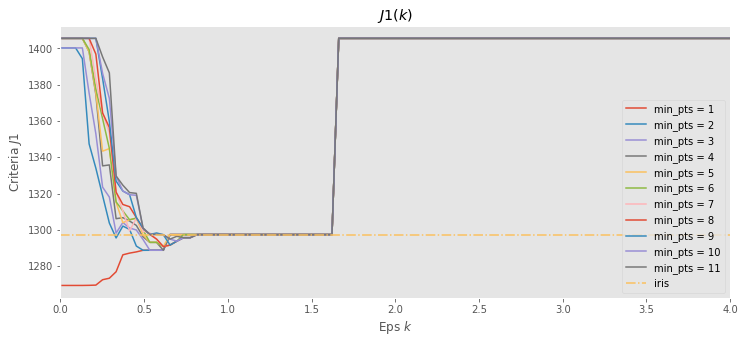

Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)


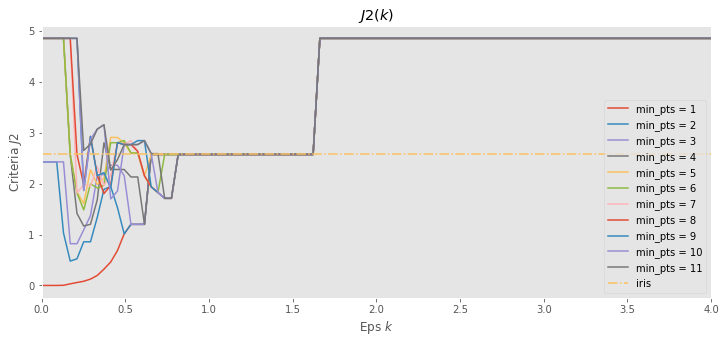

Sihouette


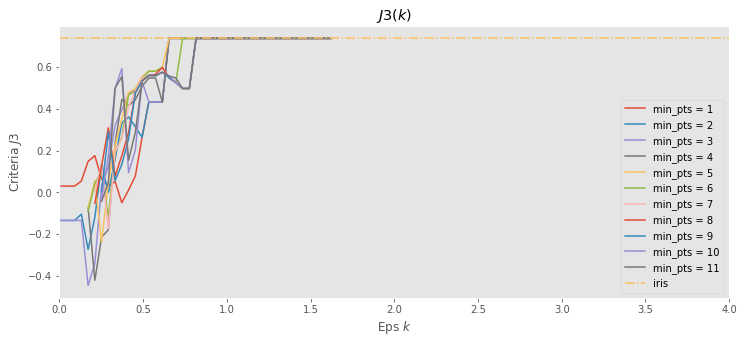

In [28]:
text = """Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
Sihouette""".split('\n')
for c1, criteria in enumerate([criteria1, criteria2, criteria3]):
    print(text[c1])
    pl.figure(figsize=(12, 5))
    pl.xlim(0,4)
    for c, cr in enumerate(criteria):
        if c1!=2:  pl.plot(eps, cr, label = "min_pts = "+str(min_pts[c]))
        else:
            ind = np.where(cr!=666)
            pl.plot(eps[ind], cr[ind], label = "min_pts = "+str(min_pts[c]))
    perfect = quality(x_iris, y_iris, dtype = c1)
    plt.plot([0,4],[perfect]*2, label = "iris", linestyle="-.")
    pl.legend()
    pl.title("$J"+str(c1+1)+"(k)$")
    pl.ylabel("Criteria $J$"+str(c1+1))
    pl.xlabel("Eps $k$")
    pl.grid()
    pl.show()

# Задание 3

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

#### -1 Загрузим выборку

In [29]:
!curl -o WDI_csv.zip 'http://databank.worldbank.org/data/download/WDI_csv.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59.3M  100 59.3M    0     0   440k      0  0:02:18  0:02:17  0:00:01  459k45:05 23057 0:00:38  0:01:43  457k:42  0:01:38  464k:17  0:01:02  0:01:15  466k 0:01:53  0:00:24  457k  439k      0  0:02:18  0:02:08  0:00:10  385k   440k      0  0:02:18  0:02:18 --:--:--  461k


In [35]:
!unzip -d WDI_csv WDI_csv.zip  

In [220]:
##############################
######### DRAW MAP  ##########
##############################

from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def draw_map(y_predict, g, cmap = cm.prism):
    draw_lst = {}
    draw_crunch = {}
    for c, i in enumerate(g.index):
            if i in countries['Alpha-3 code'].get_values():
                cname, lat, long = countries[countries['Alpha-3 code'] == i].get_values()[0]
                draw_lst[cname] = [lat, long, y_predict[c]]
                if y_predict[c] not in draw_crunch:
                    draw_crunch[y_predict[c]] = [[lat, long]]
                else:
                    draw_crunch[y_predict[c]].append([lat, long])
    def get_rgb(n, cmap = cm.jet):
        t = cmap((1+n)*10)
        rgb = '#'
        for i in t[:3]:
            temp = hex(int(i*(16**2-1)))[2:]
            temp = (2-len(temp))*'0'+temp
            rgb+=temp
        return rgb

    plt.figure(figsize = (16,12))
    map = Basemap()

    map.drawcoastlines()
    map.drawcountries()
    lst = draw_lst.values()
    N = len(set(y_predict))
    for clr, lst in draw_crunch.items():
    #     if clr in [0,2]: continue
        map.plot([i[1] for i in lst], [i[0] for i in lst],'bo', c = get_rgb(clr, cmap = cmap), markersize=8)

    plt.savefig('test.png')
    plt.show()
    return
# draw_map(y_predict_big, r)

In [206]:
## Задание 3
YEAR = '2016'

In [207]:
#Загрузим данные
df = pd.read_csv('WDI_csv/WDIDATA.csv')

In [208]:
df = df.fillna(1488666)
t = df[df[YEAR] != 1488666]

In [209]:
#Загрузим файл: код страны/широта/долгота
df = pd.read_csv("Country_List_ISO_3166_Codes_Latitude_Longitude.csv")
a = set(t['Country Code'].unique())
b = set(df['Alpha-3 code'].unique())
countries = df[df['Alpha-3 code'].isin(a & b)][['Alpha-3 code', "Latitude (average)", "Longitude (average)"]]

In [210]:
t.keys()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')

In [211]:
g = {}
for key, lst in t.groupby("Country Code"):
    if not key in set(countries['Alpha-3 code']):
        continue
    g[key] = {}
#     print(9)
    for ind, value in zip(lst['Indicator Name'], lst[YEAR]):
        g[key][ind] = value
g = pd.DataFrame.from_dict(g).T

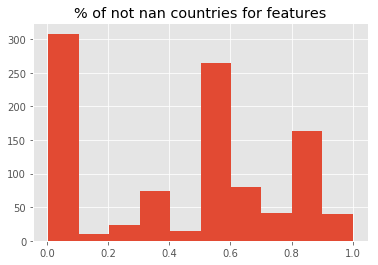

In [212]:
plt.title("% of not nan countries for features")
plt.hist([1.0*len(g[i].dropna())/len(g[i]) for i in g.keys()])
plt.show()

#### Оставим все признаки, 0.99% встречаемости и больше

In [213]:
features = list(filter(lambda x:len(g[x].dropna())/len(g[x])>0.99, g.keys()))

In [214]:
g_predicted = g[features].copy()

In [215]:
g_predicted = g_predicted.fillna(g_predicted.mean())
for i in g_predicted.keys():
    g_predicted[i] = (g_predicted[i] - g_predicted[i].mean())/g_predicted[i].std()  

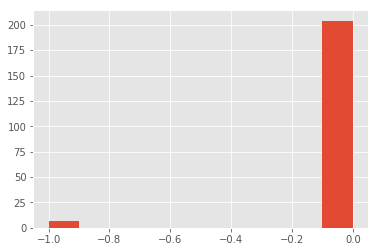

Counter({0: 204, -1: 7})


In [217]:
from sklearn.cluster import KMeans
y_predict = DBSCAN(eps = 6, min_pts = 4).fit_predict(g_predicted.get_values())#, show_outliers = False)
# y_predict = KMeans(n_clusters=2).fit_predict(g_predicted.get_values())
plt.hist(y_predict)
plt.show()
print(Counter(y_predict))

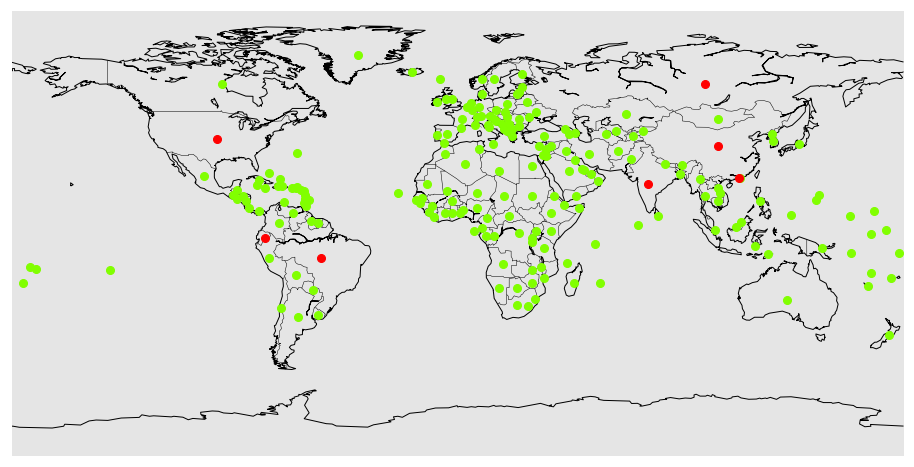

In [221]:
draw_map(y_predict, g_predicted)

### DBscan по 14 максимально встречаемым признакам дает два кластера (кластер и выбросы)
Выбросы это США, страны БРИК  и 

Признаки:
Bird species, threatened, Fish species, threatened, Land area (sq. km), Mammal species, threatened, Plant species (higher), threatened, Population density (people per sq. km of land area), Population growth (annual %), Population, total, Rural population, Rural population (% of total population), Surface area (sq. km), Urban population, Urban population (% of total), Urban population growth (annual %)

In [49]:
g.index[np.where(y_predict == -1)]

Index(['BRA', 'CHN', 'ECU', 'IND', 'MAC', 'RUS', 'USA'], dtype='object')

# TSNE

In [222]:
from sklearn.manifold import TSNE
mod = TSNE(n_components=2, perplexity=30.0, early_exaggeration=4.0, 
           learning_rate=100.0, n_iter=1000, metric='euclidean', init='random',
           verbose=0, random_state=None)
x_new = mod.fit_transform(g_predicted.get_values())


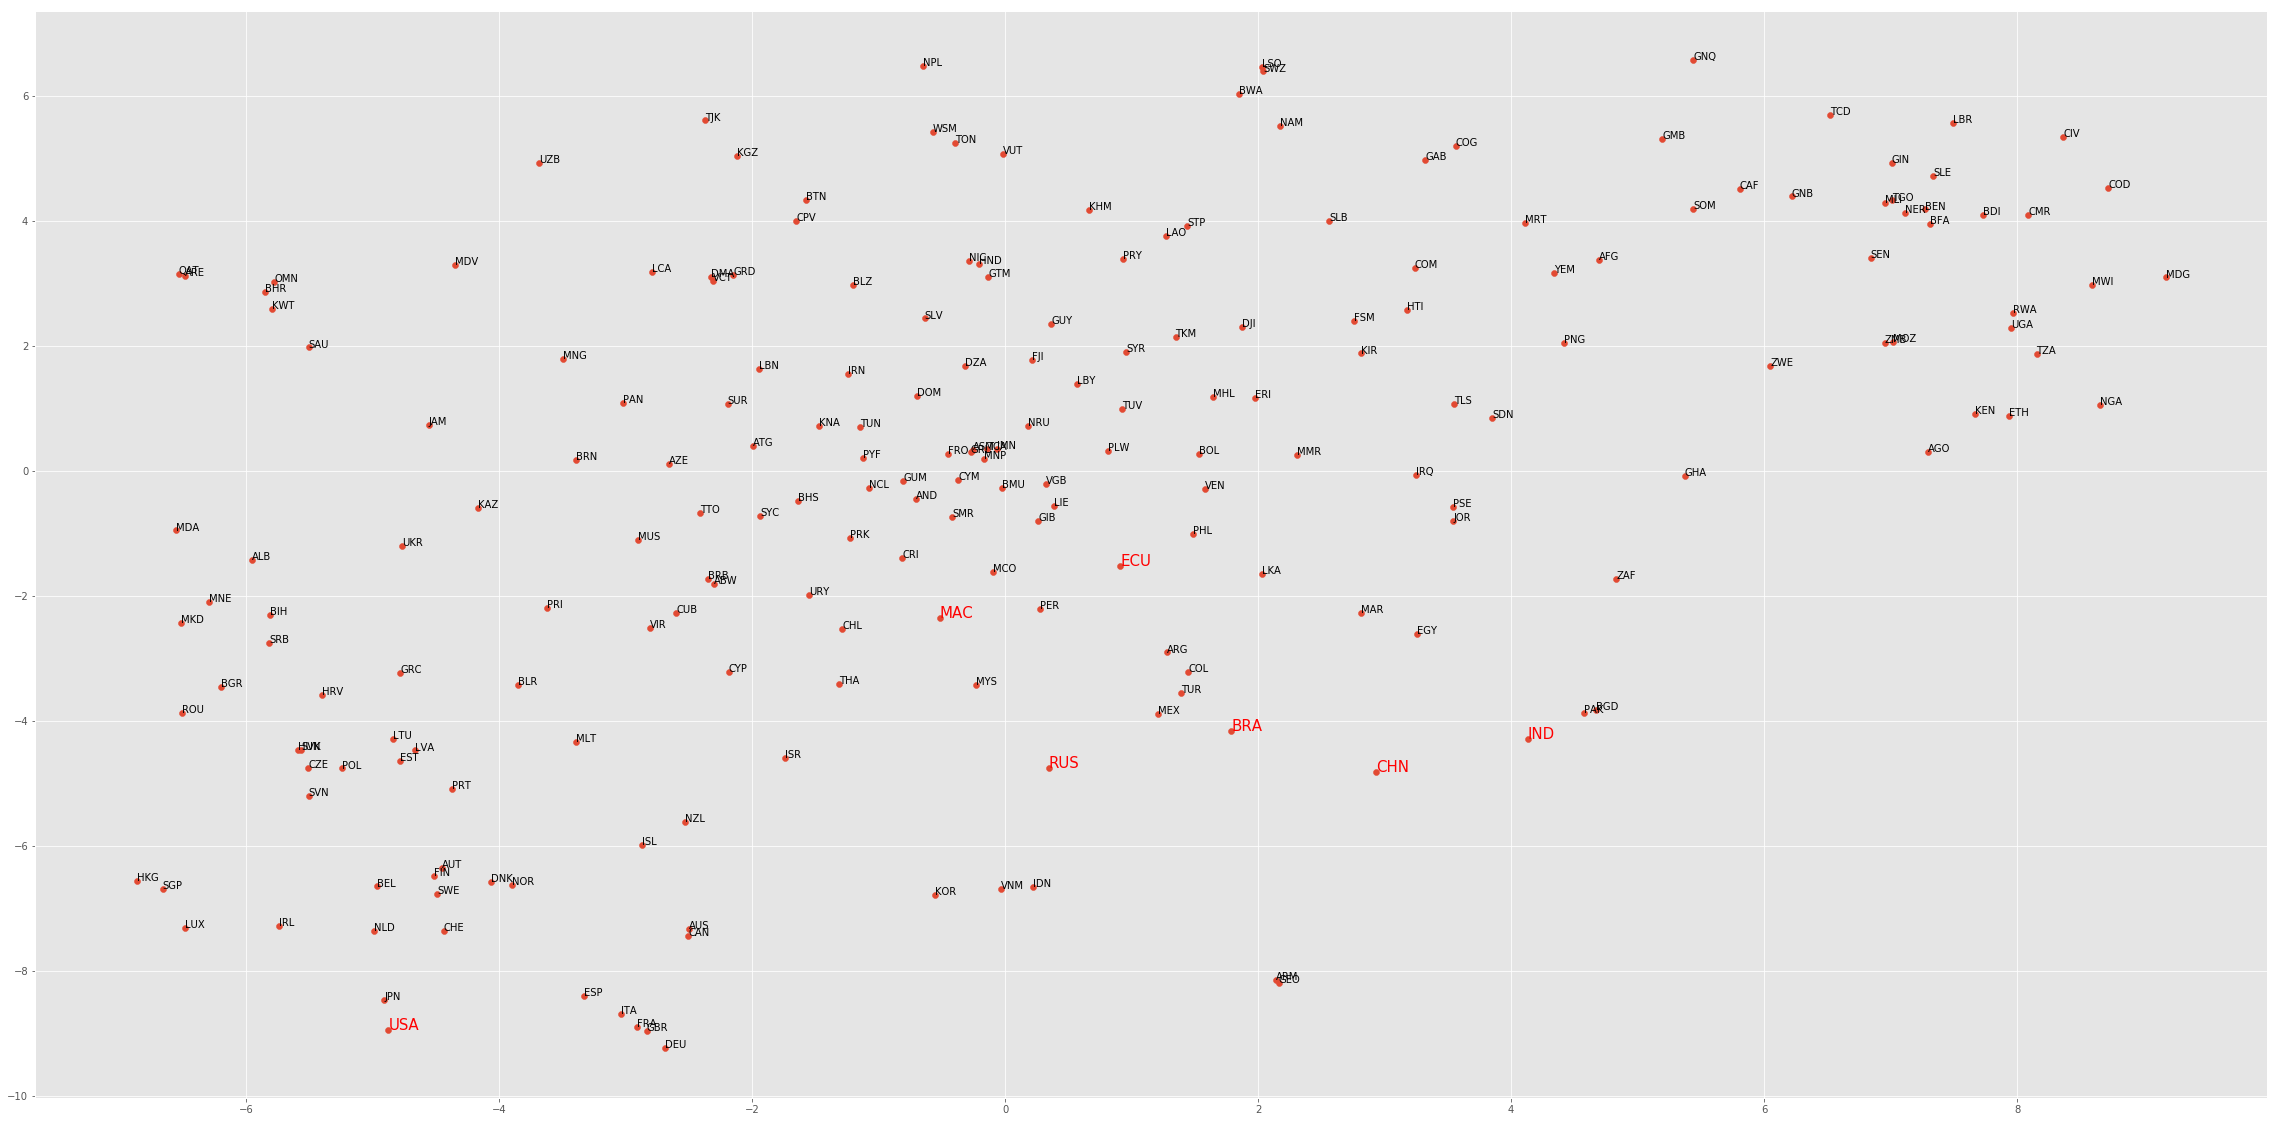

In [228]:
plt.figure(figsize = (40,20))
plt.scatter(x_new[:,0],x_new[:,1])
for i,txt in zip(x_new, g_predicted.index.get_values()):
    if txt in g.index[np.where(y_predict == -1)]:
        plt.text(i[0],i[1],txt, color = 'red', fontsize = 15)
    else:  
        plt.text(i[0],i[1],txt)
        
plt.savefig("countries_1.png")
plt.show()

### Ради интереса повторим все это на большем количестве признаков
(рискуем встретиться с проклятием размерности)

### t-sne for all features

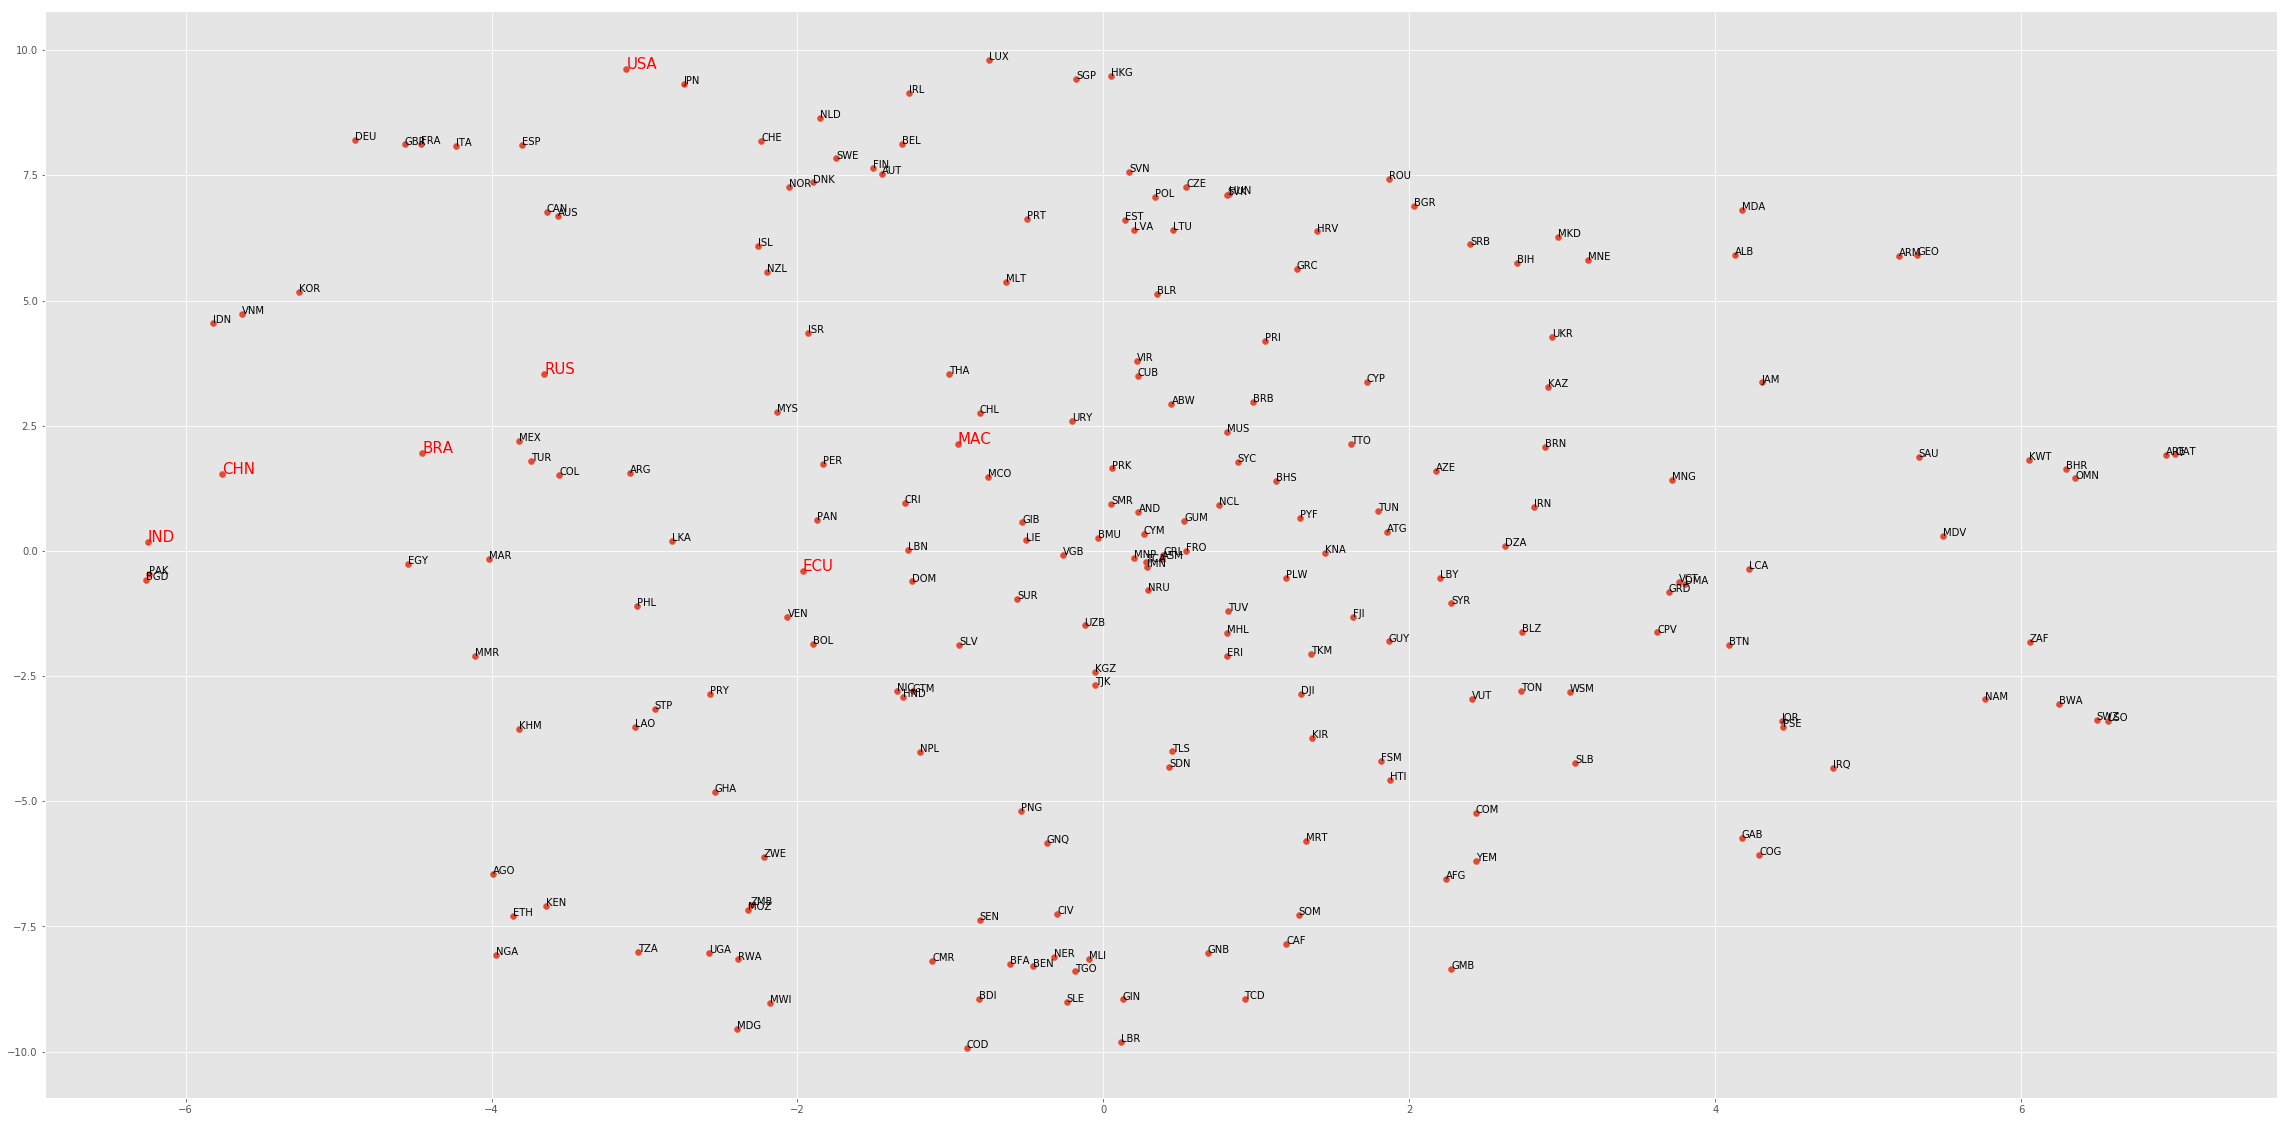

In [270]:
r = g.copy()
for i in r.keys():
    r[i] = (r[i]-r[i].mean())/r[i].std()
r = r.fillna(0.0)
from sklearn.manifold import TSNE
mod = TSNE(n_components=2, perplexity=30.0, early_exaggeration=4.0, 
           learning_rate=100.0, n_iter=1000, metric='euclidean', init='random',
           verbose=0, random_state=None)
x_new = mod.fit_transform(r.get_values())


plt.figure(figsize = (40,20))
plt.scatter(x_new[:,0],x_new[:,1])
for i,txt in zip(x_new, r.index.get_values()):
    if txt in g.index[np.where(y_predict == -1)]:
        plt.text(i[0],i[1],txt, color = 'red', fontsize = 15)
    else:  
        plt.text(i[0],i[1],txt)
        
plt.savefig("countries_tsne_all.png")
plt.show()

### t-sne for 80% not nan

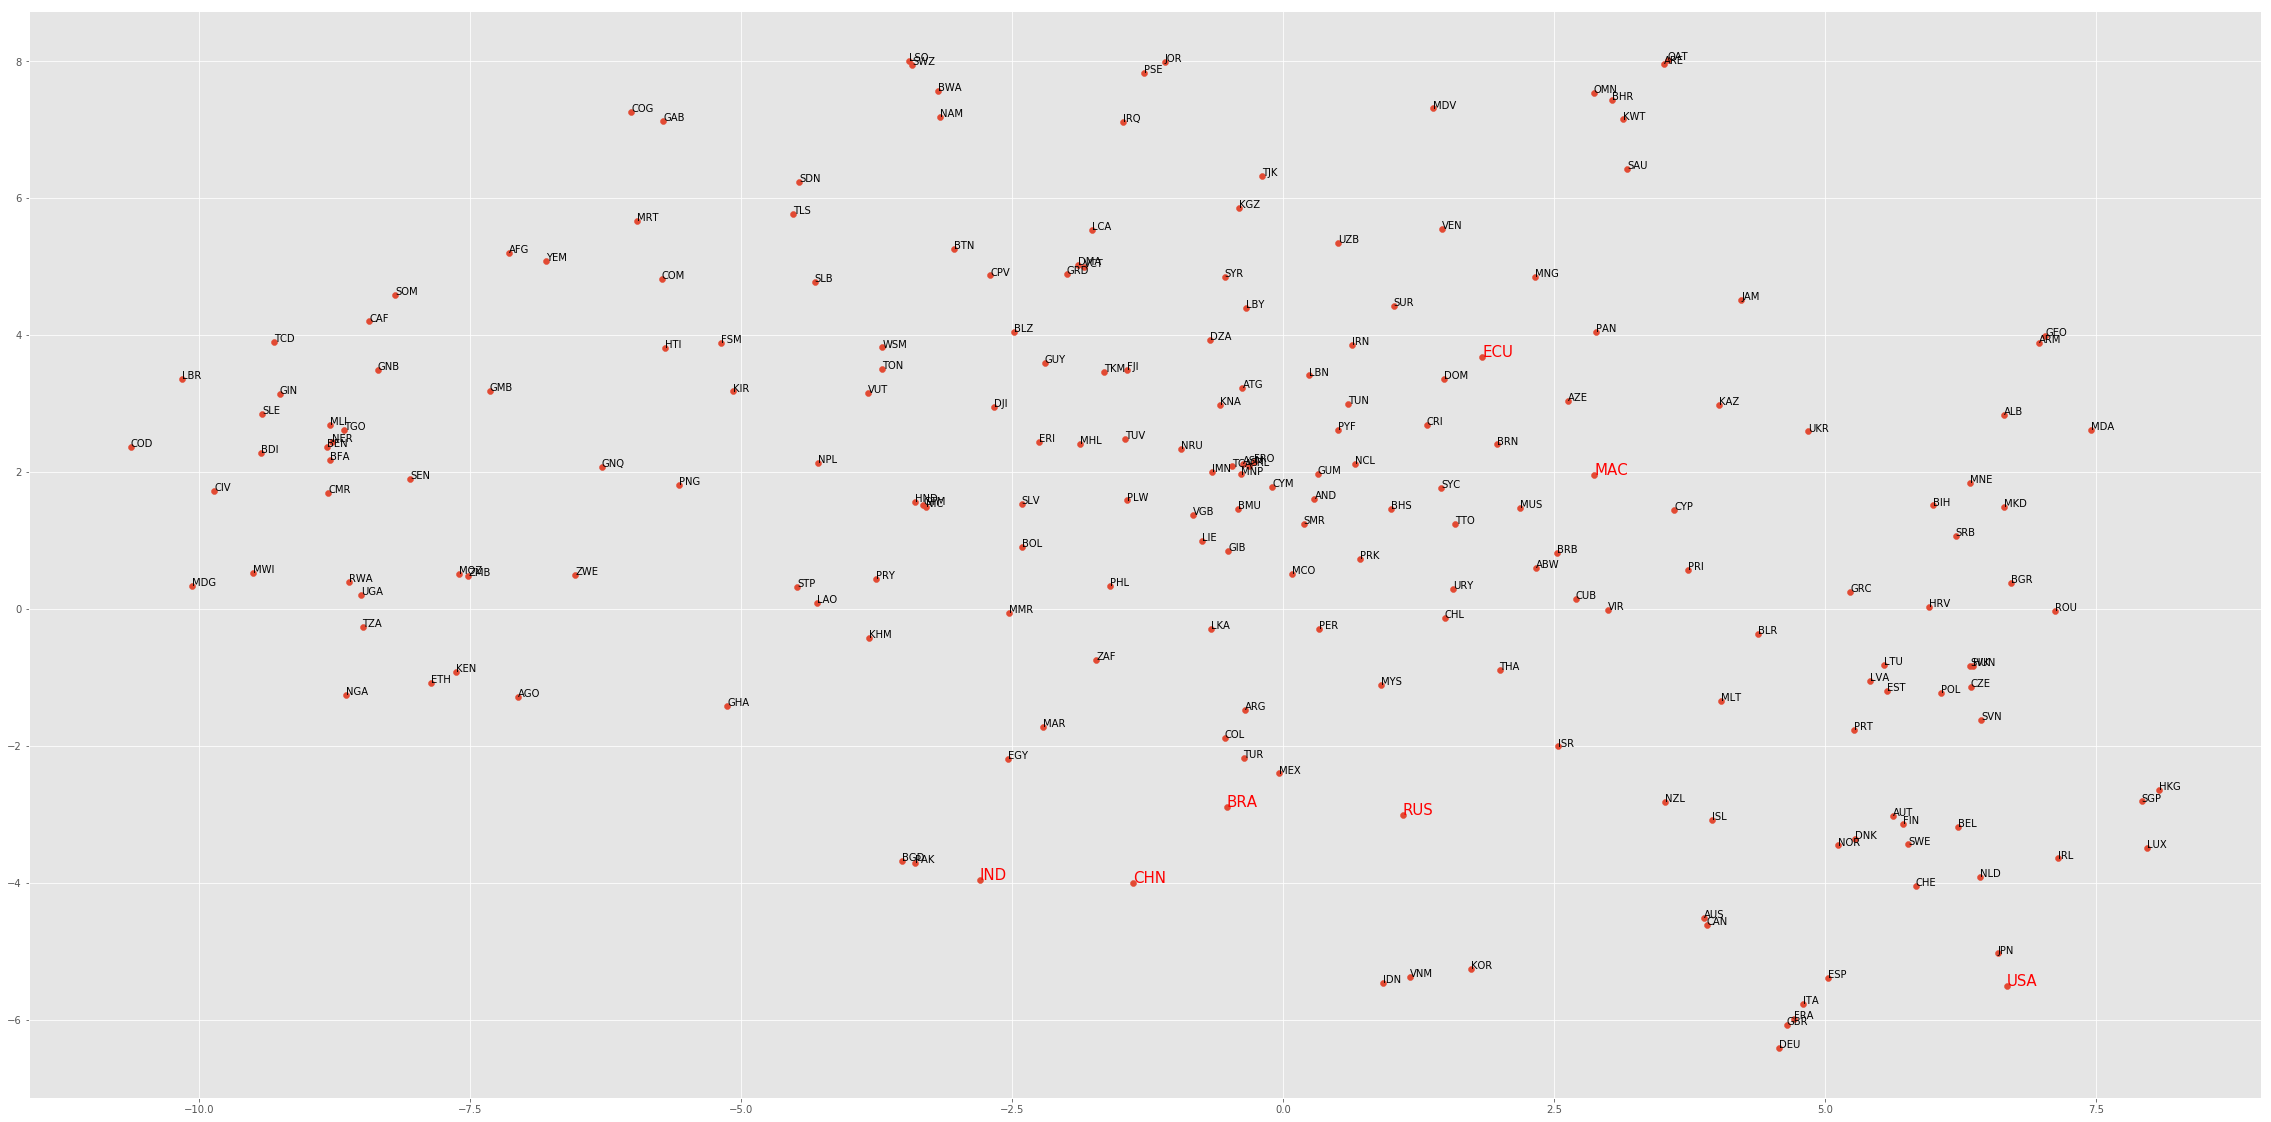

In [341]:
r = g.copy()
for i in r.keys():
    r[i] = (r[i]-r[i].mean())/r[i].std()
r = r.fillna(0.0)

from sklearn.manifold import TSNE
mod = TSNE(n_components=2, perplexity=30.0, early_exaggeration=4.0, 
           learning_rate=100.0, n_iter=1000, metric='euclidean', init='random',
           verbose=0, random_state=None)
x_new = mod.fit_transform(r.get_values())


plt.figure(figsize = (40,20))
plt.scatter(x_new[:,0],x_new[:,1])
for i,txt in zip(x_new, r.index.get_values()):
    if txt in g.index[np.where(y_predict == -1)]:
        plt.text(i[0],i[1],txt, color = 'red', fontsize = 15)
    else:  
        plt.text(i[0],i[1],txt)
        
plt.savefig("countries_top200_features.png")
plt.show()

### For GDP

In [349]:
#Возьмем только признаки GDP (ВВП - Валовой внутренний продукт)
features = list(filter(lambda x:'GDP' in x, g.keys()))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


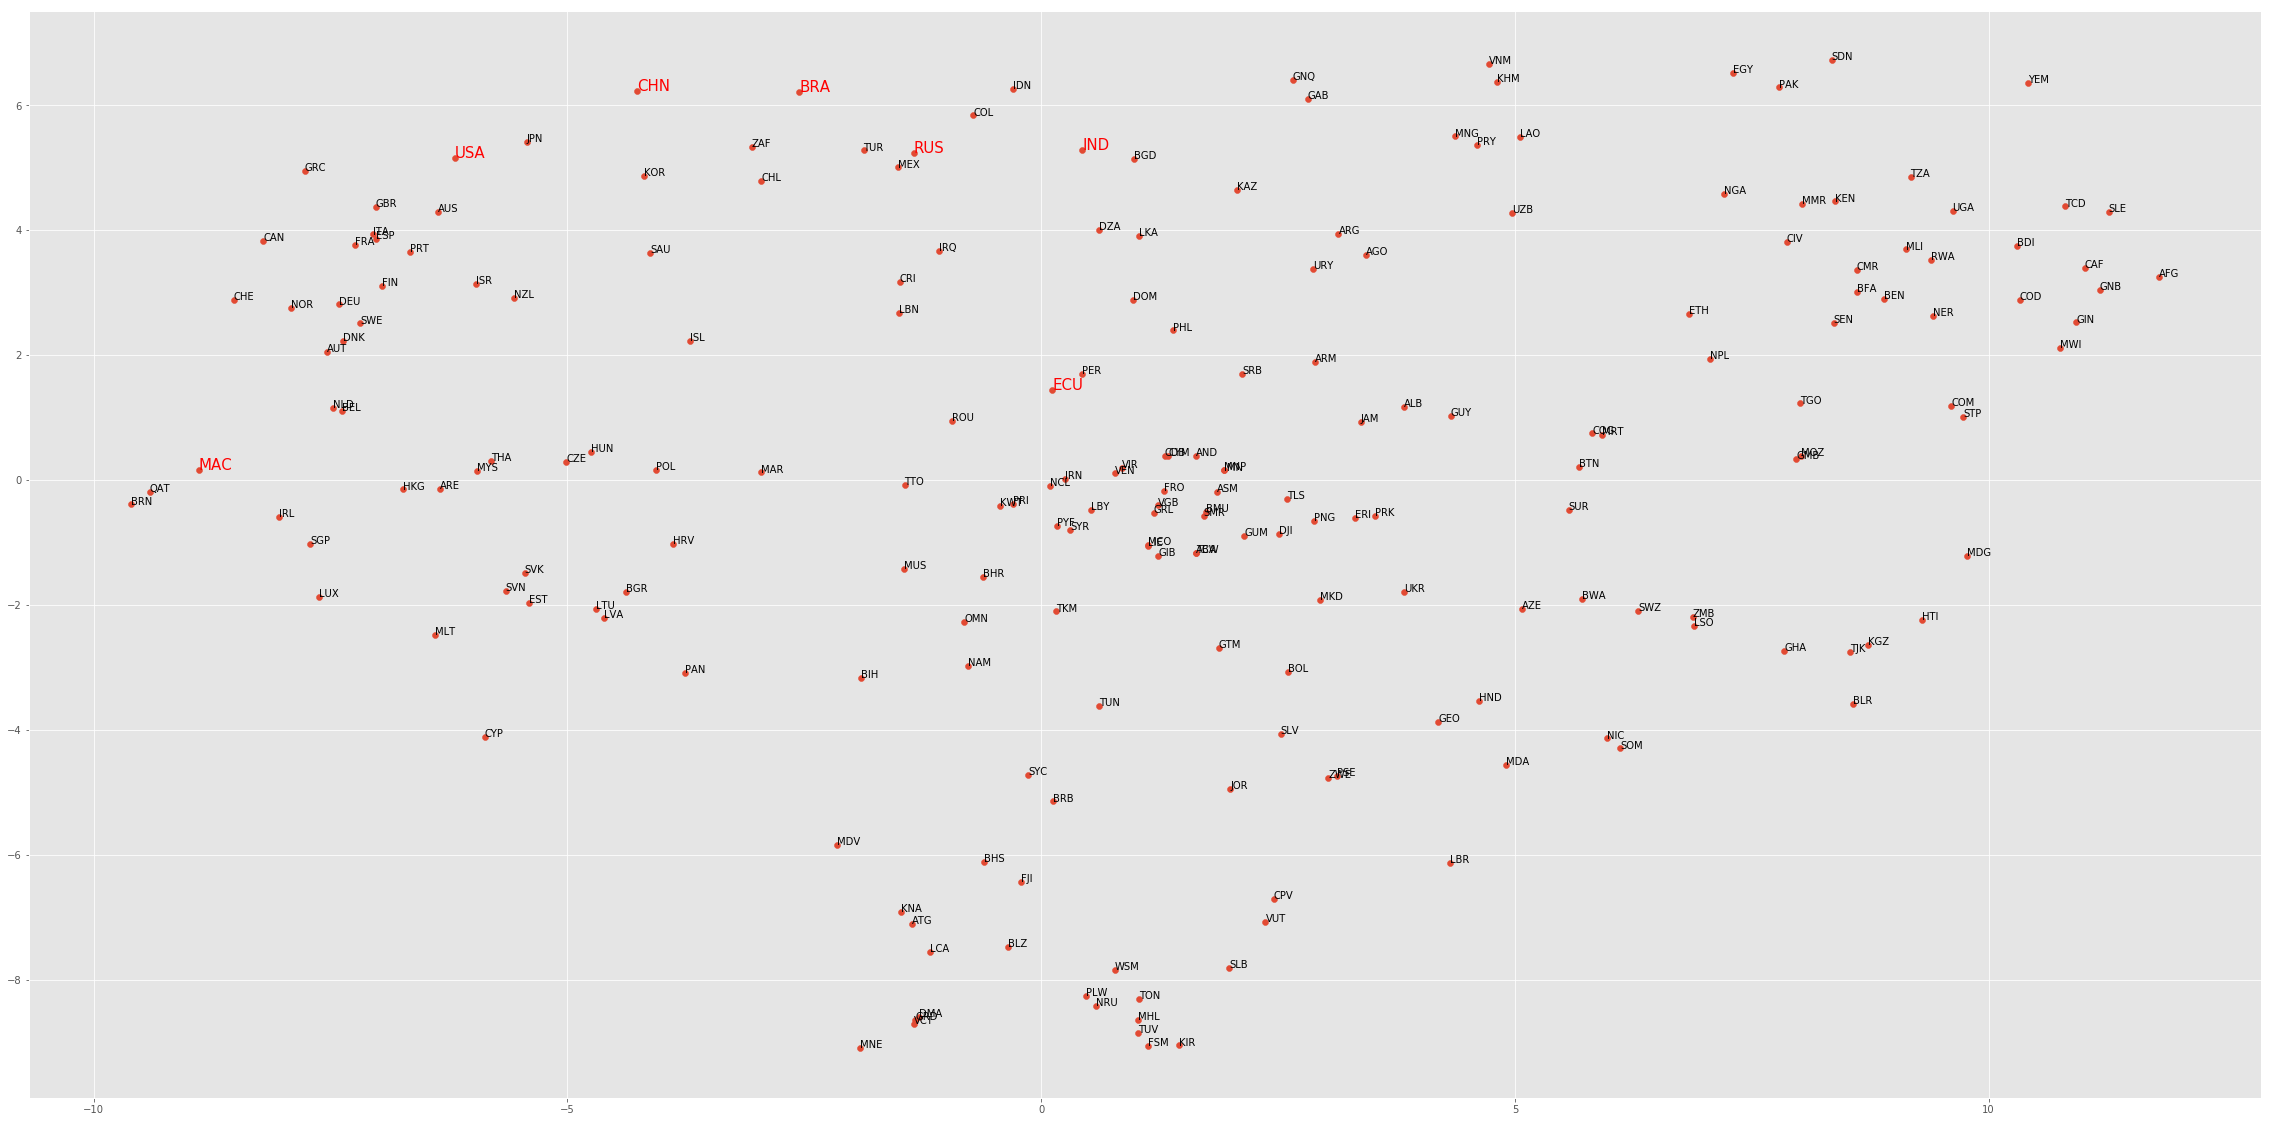

In [350]:
r = g.copy()
#list(filter(lambda i:1.0*len(r[i].dropna())/len(r[i])> 0.8, r.keys()))
r = r[features]
for i in r.keys():
    r[i] = np.log(r[i]) # Отлогарифмируем переменные
    r[i] = (r[i]-r[i].mean())/r[i].std()
r = r.fillna(0.0)

from sklearn.manifold import TSNE
mod = TSNE(n_components=2, perplexity=30.0, early_exaggeration=4.0, 
           learning_rate=100.0, n_iter=1000, metric='euclidean', init='random',
           verbose=0, random_state=None)
x_new = mod.fit_transform(r.get_values())


plt.figure(figsize = (40,20))
plt.scatter(x_new[:,0],x_new[:,1])
for i,txt in zip(x_new, r.index.get_values()):
    if txt in g.index[np.where(y_predict == -1)]:
        plt.text(i[0],i[1],txt, color = 'red', fontsize = 15)
    else:  
        plt.text(i[0],i[1],txt)
        
plt.savefig("countries_GDP_features.png")
plt.show()

Counter({2: 102, 1: 56, 0: 53})


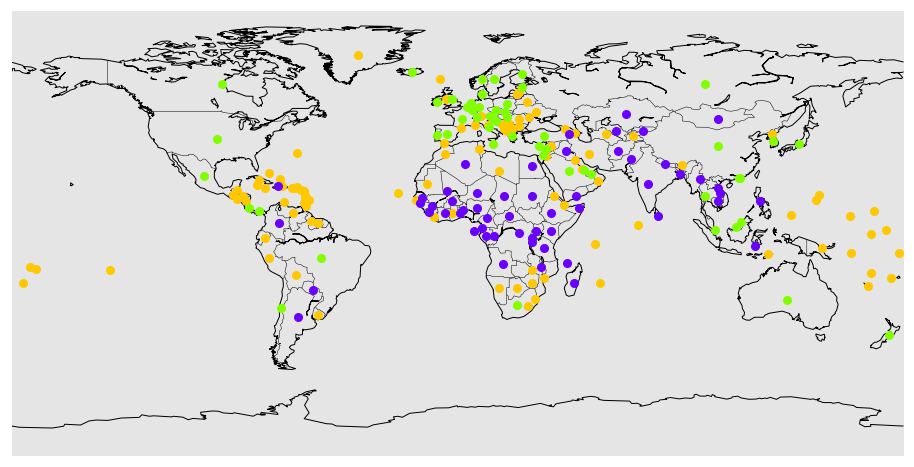

In [375]:
y_predict_big = KMeans(n_clusters=3).fit_predict(r.get_values()) #Так 
# y_predict_big = DBSCAN(eps = 4, min_pts = 5).fit_predict(r.get_values())


print(Counter(y_predict_big))
draw_map(y_predict_big, r)

| Страны  | Уровень жизни |
|---------|---------|
| Зеленые | высокий |
| Желтые  | удоволетворительный |
| Синии   | плохой |

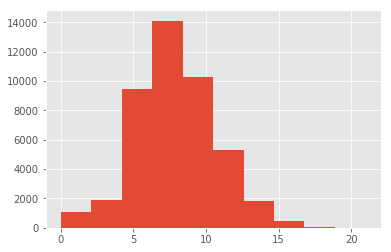

In [374]:
from scipy.spatial import distance_matrix
plt.hist(distance_matrix(r.get_values(), r.get_values()).ravel())
plt.show()

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.